Мое решение тестового задания.

Задача:

Создать функцию на языке Python, которая для указанного произвольного пользователя берет его историю шагов и на выходе отдает список размеченных дней: неизвестно, обычный или необычный.

Ваша цель - максимально попасть в субъективное ощущение пользователя, чтобы он согласился с вашим мнением о том, что сегодня он прошел 10 000 шагов и это необычно. Или сегодня он прошел 6 000 шагов и в этом нет ничего необычного.

То есть критерий - это попадание в ожидание среднестатистического человека о работе “умной” системы, которая смотрит его данные и решает, что сегодня обычный или необычный день. И да, мы осознаем, как звучит эта задача, но это настоящая задача и она прекрасно демонстрирует ход мыслей человека.

Исходные данные:

Записи по шагам одного человека (в качестве примера) в течение около 3х месяцев. Каждая запись - это некий промежуток времени с известным количеством шагов в этот промежуток. Так присылают данные фитнес-трекеры, как именно они выбирают этот промежуток - неизвестно.


Пока не будем писать функцию, а для начала разберемся с данным и попробуем найти решение.


In [1]:
import numpy as np
import pandas as pd
import datetime


import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
data = pd.read_csv('query_result_2019-12-24T07_29_06.659397Z.csv', index_col=['Time Start Local Tz'], parse_dates=['Time Start Local Tz'])

In [3]:
data.head()

,Time End,Time End Local Tz,Time Offset,Time Start,User ID,Value
Time Start Local Tz,,,,,,
2019-05-05 12:39:59+03:00,2019-05-05T09:40:00+03:00,2019-05-05T12:40:00+03:00,10800,2019-05-05T09:39:59+03:00,2166,1.0
2019-05-05 14:12:51+03:00,2019-05-05T11:13:29+03:00,2019-05-05T14:13:29+03:00,10800,2019-05-05T11:12:51+03:00,2166,34.0
2019-05-05 15:07:39+03:00,2019-05-05T12:07:42+03:00,2019-05-05T15:07:42+03:00,10800,2019-05-05T12:07:39+03:00,2166,1.0
2019-05-05 16:04:02+03:00,2019-05-05T13:04:05+03:00,2019-05-05T16:04:05+03:00,10800,2019-05-05T13:04:02+03:00,2166,3.0
2019-05-05 16:18:13+03:00,2019-05-05T13:18:18+03:00,2019-05-05T16:18:18+03:00,10800,2019-05-05T13:18:13+03:00,2166,6.0


Для работы попробуем оставить локальное время и шаги. Преобразуем и проанализируем данные в двух форматах. Первый: просуммируем все шаги по дням. Второй: Просуммируем все шаги по часам.

Первый вариант:

In [4]:
data_copy_days = data.copy()

In [5]:
data_copy_days.drop(['Time End','Time Start','Time Offset','User ID','Time End Local Tz'], axis=1, inplace=True)

In [6]:
data_day = data_copy_days.resample('D').sum()
data_day.head()

,Value
Time Start Local Tz,
2019-05-02 00:00:00+03:00,12977.0
2019-05-03 00:00:00+03:00,17003.0
2019-05-04 00:00:00+03:00,14312.0
2019-05-05 00:00:00+03:00,11124.0
2019-05-06 00:00:00+03:00,7467.0


In [7]:
data_day['date'] = data_day.index.date
data_day.head()

,Value,date
Time Start Local Tz,,
2019-05-02 00:00:00+03:00,12977.0,2019-05-02
2019-05-03 00:00:00+03:00,17003.0,2019-05-03
2019-05-04 00:00:00+03:00,14312.0,2019-05-04
2019-05-05 00:00:00+03:00,11124.0,2019-05-05
2019-05-06 00:00:00+03:00,7467.0,2019-05-06


Посмотрим еженедельный график шагов

/Users/AlexLem/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



Time Start Local Tz
19    AxesSubplot(0.125,0.125;0.775x0.755)
20    AxesSubplot(0.125,0.125;0.775x0.755)
21    AxesSubplot(0.125,0.125;0.775x0.755)
22    AxesSubplot(0.125,0.125;0.775x0.755)
23    AxesSubplot(0.125,0.125;0.775x0.755)
24    AxesSubplot(0.125,0.125;0.775x0.755)
25    AxesSubplot(0.125,0.125;0.775x0.755)
26    AxesSubplot(0.125,0.125;0.775x0.755)
27    AxesSubplot(0.125,0.125;0.775x0.755)
28    AxesSubplot(0.125,0.125;0.775x0.755)
29    AxesSubplot(0.125,0.125;0.775x0.755)
30    AxesSubplot(0.125,0.125;0.775x0.755)
31    AxesSubplot(0.125,0.125;0.775x0.755)
32    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

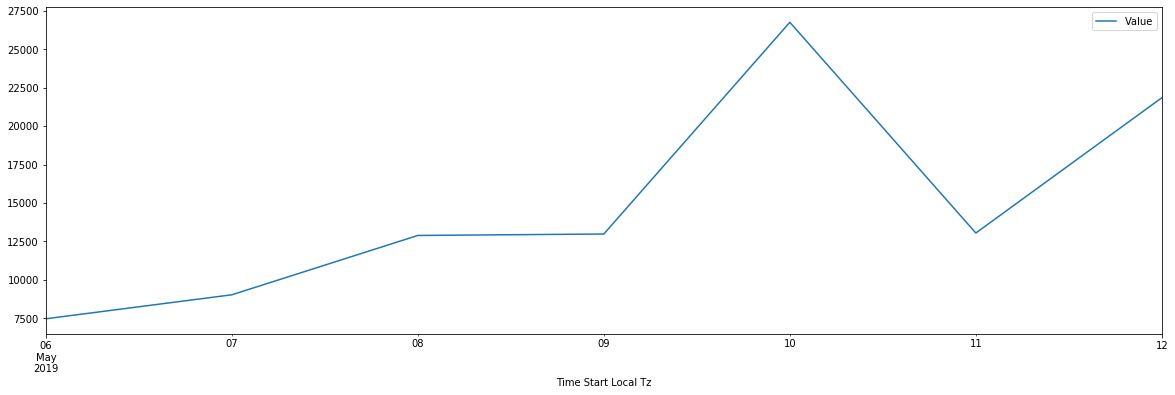

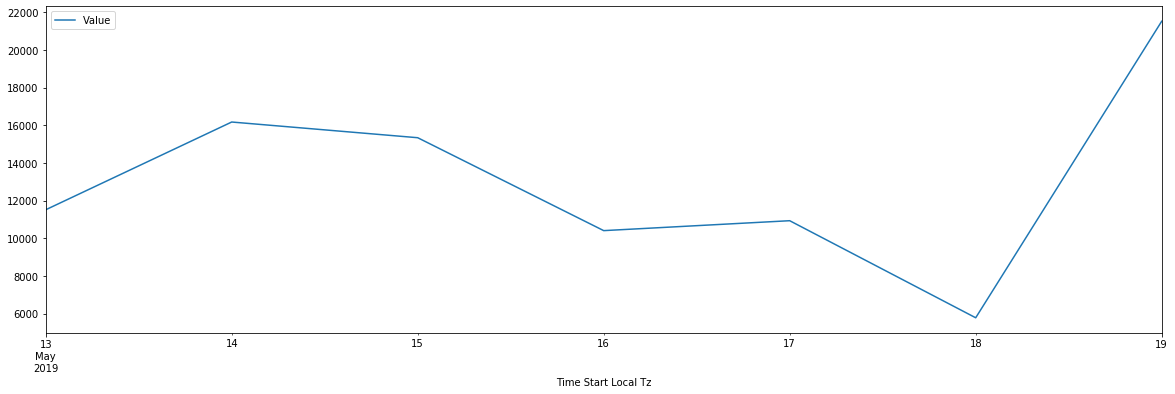

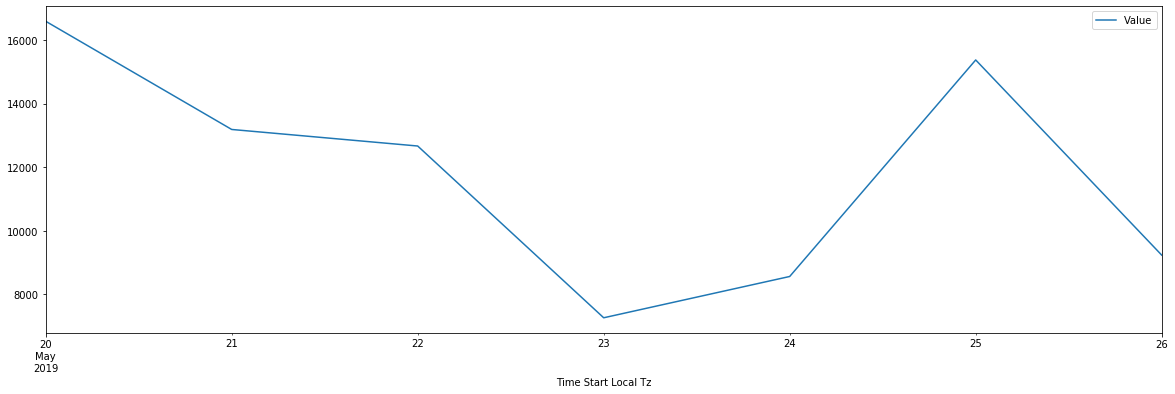

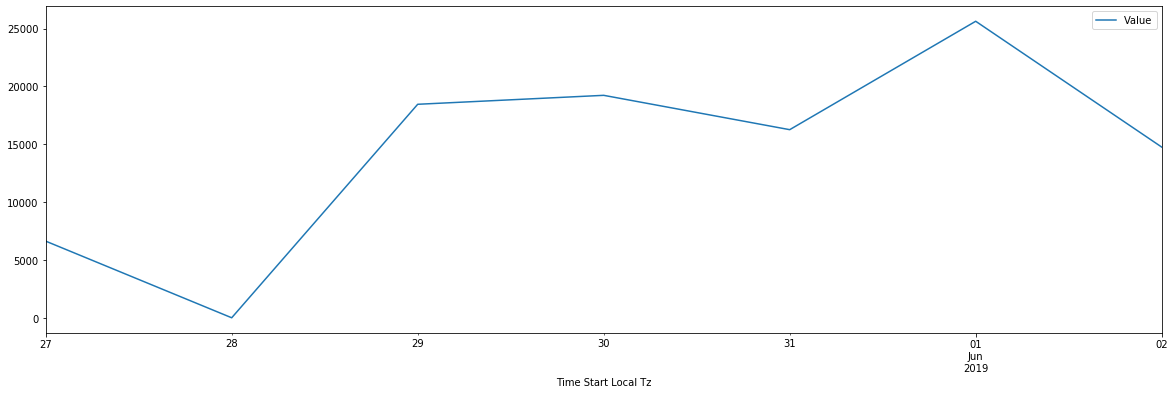

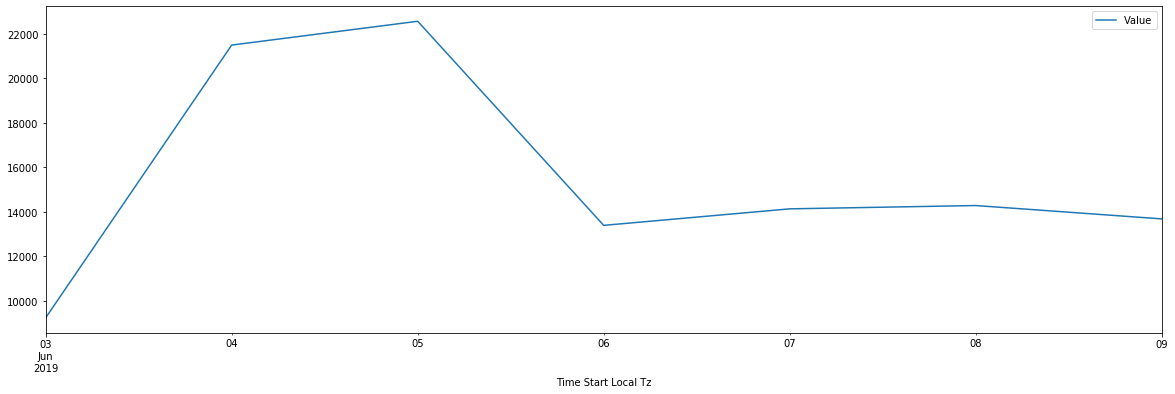

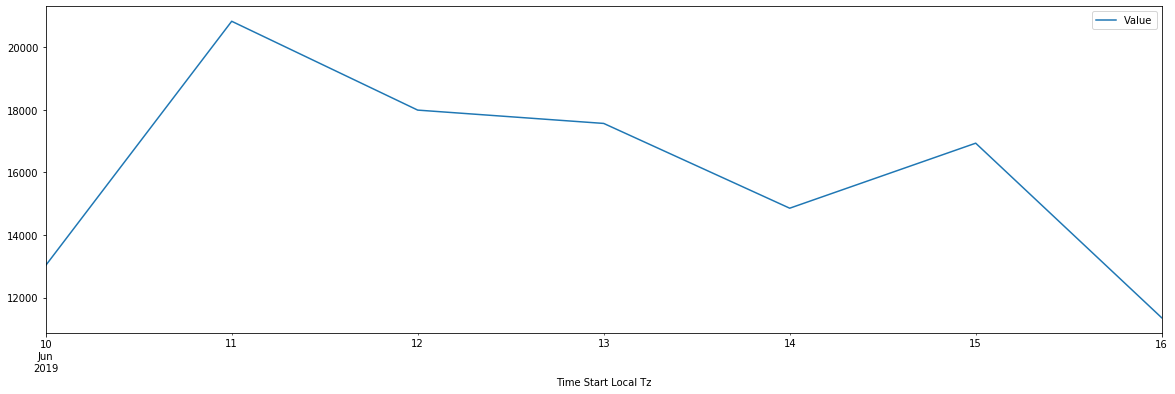

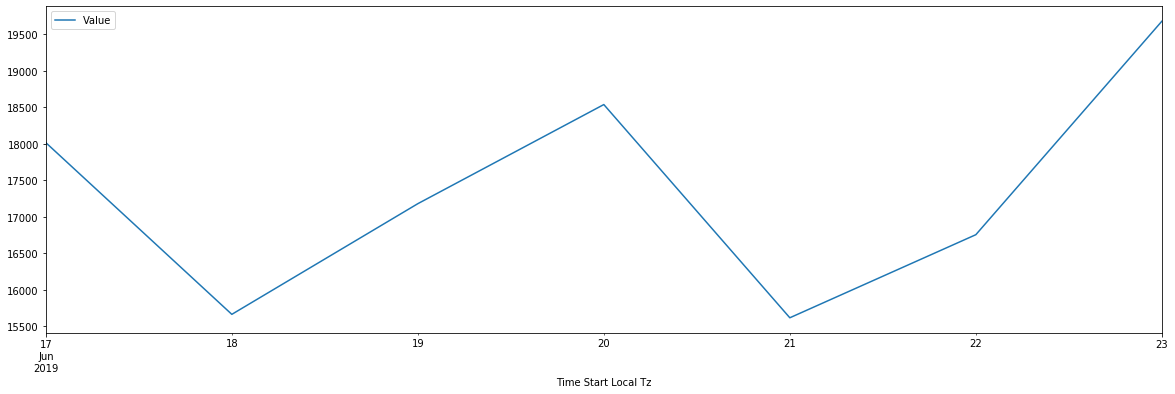

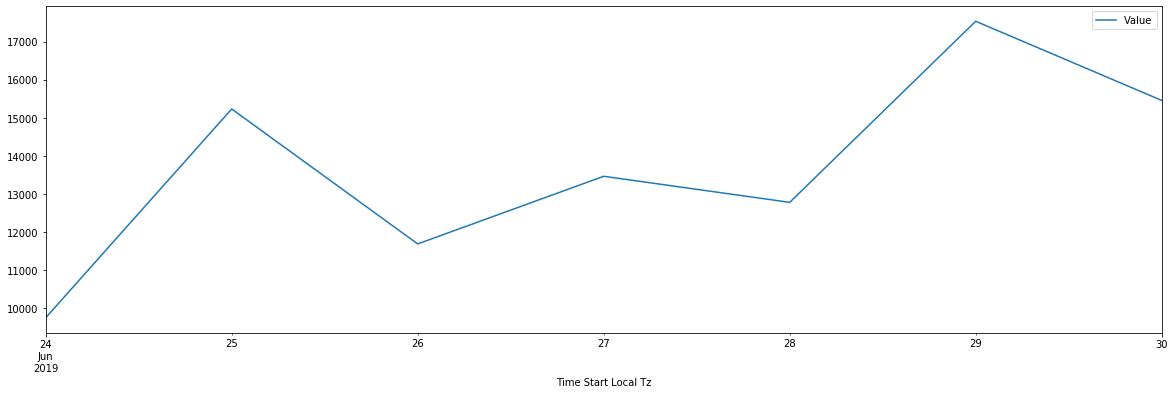

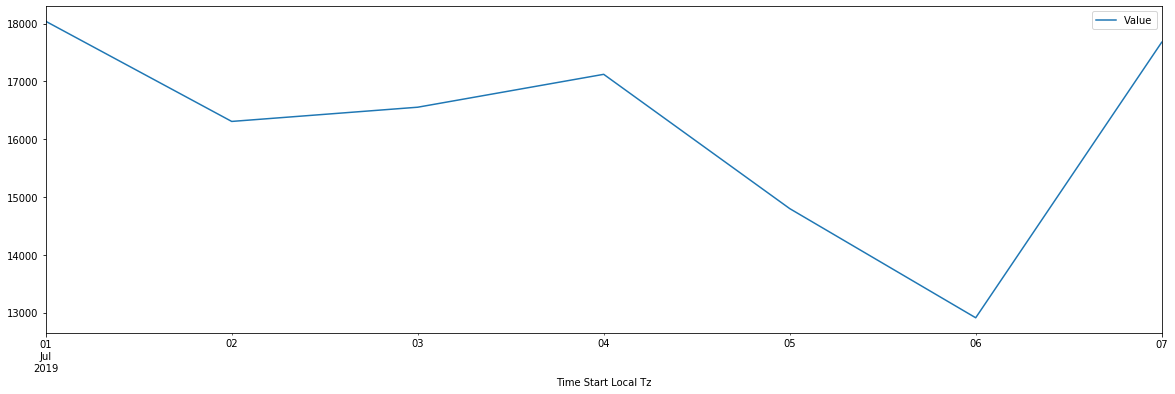

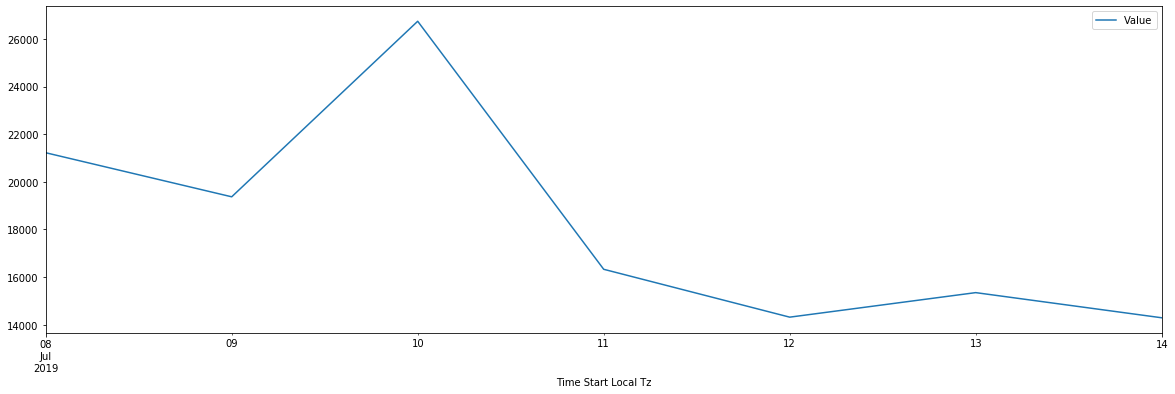

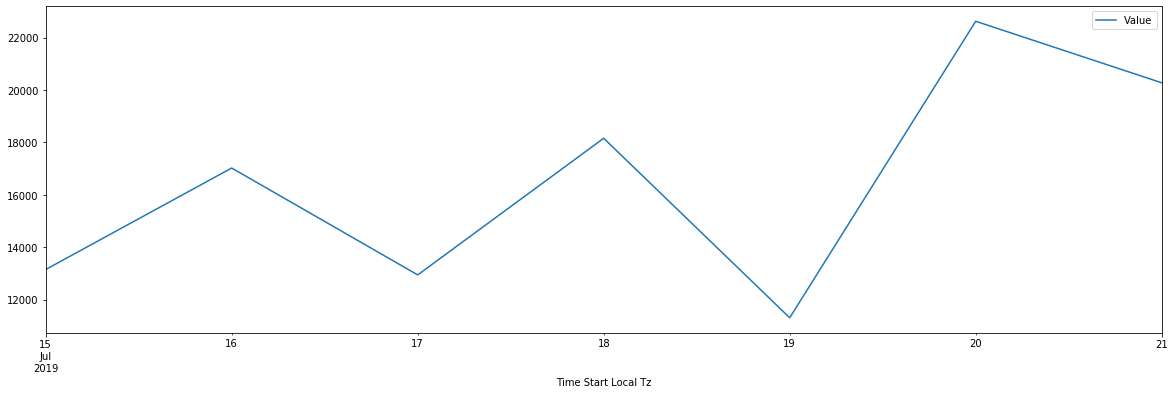

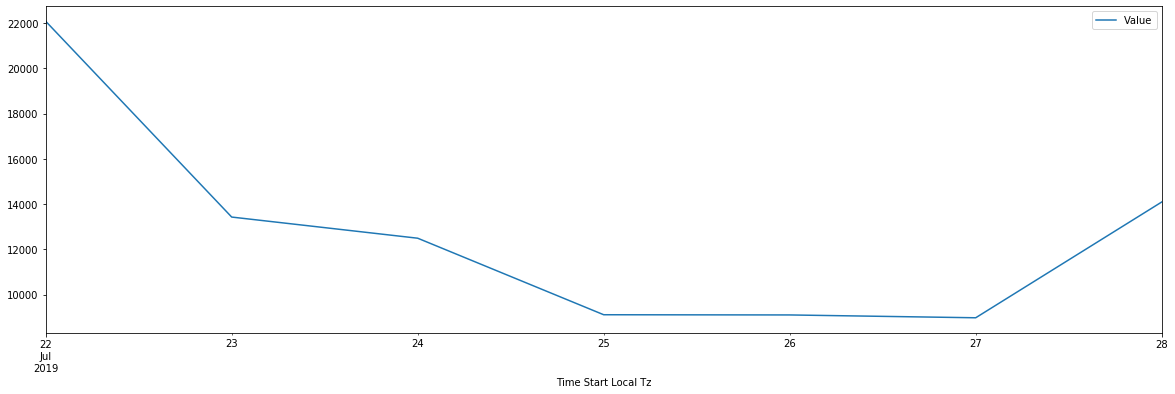

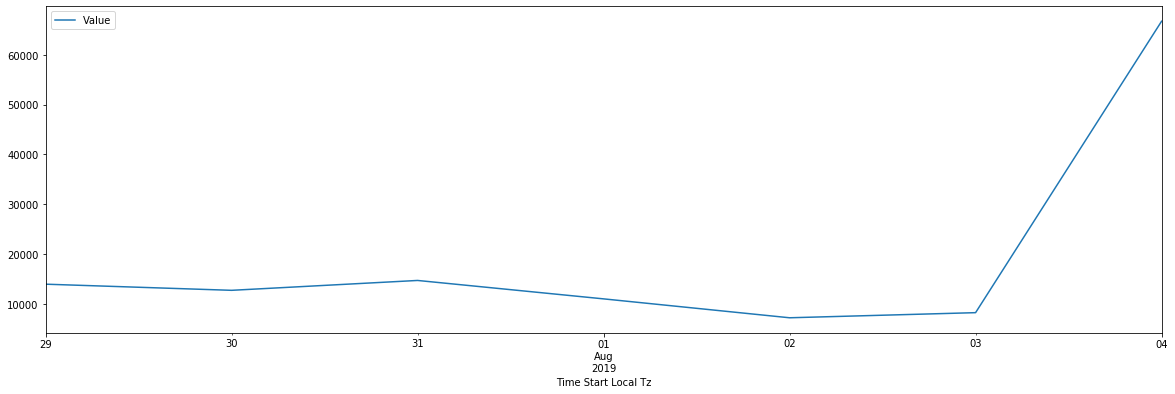

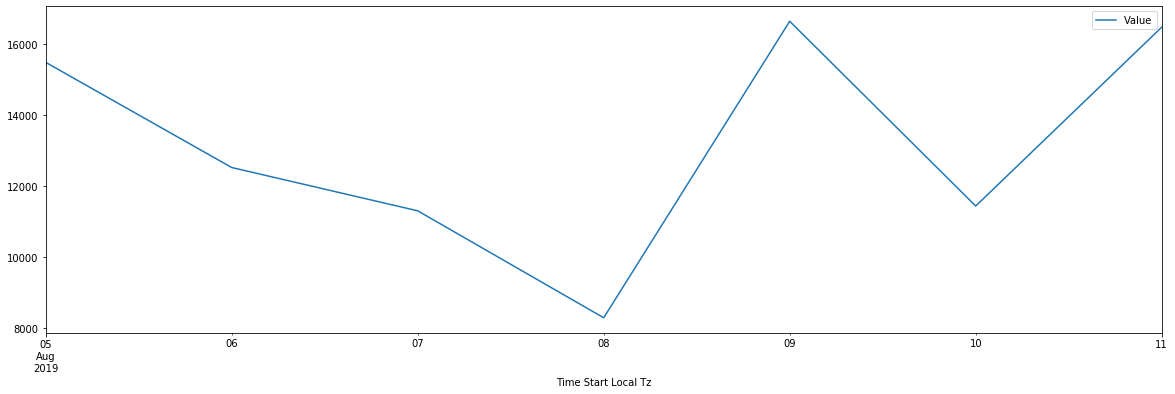

In [8]:
data_day['2019-05-06':'2019-08-11'].groupby(by=[data_day['2019-05-06':'2019-08-11'].index.week]).plot(figsize=(20,6))

Построим график распределения данных по дням недели

In [9]:
data_day_boxplot_copy= data_day.copy()

In [10]:
data_day_boxplot_copy['date'] = data_day.index.date
data_day_boxplot_copy['weekday'] = data_day.index.weekday
data_day_boxplot_copy

,Value,date,weekday
Time Start Local Tz,,,
2019-05-02 00:00:00+03:00,12977.0,2019-05-02,3
2019-05-03 00:00:00+03:00,17003.0,2019-05-03,4
2019-05-04 00:00:00+03:00,14312.0,2019-05-04,5
2019-05-05 00:00:00+03:00,11124.0,2019-05-05,6
2019-05-06 00:00:00+03:00,7467.0,2019-05-06,0
...,...,...,...
2019-08-10 00:00:00+03:00,11443.0,2019-08-10,5
2019-08-11 00:00:00+03:00,16482.0,2019-08-11,6
2019-08-12 00:00:00+03:00,15952.0,2019-08-12,0


Создадим таблицу, где данные будут разбиты по дням недели

In [11]:
data_day_boxplot = data_day_boxplot_copy.pivot(index='date', columns='weekday', values='Value')
#data_day_boxplot.fillna(0, inplace=True)
data_day_boxplot.describe()

weekday,0,1,2,3,4,5,6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,14141.333333,14312.800000,15593.733333,13722.733333,14019.066667,14613.400000,19217.066667
std,4690.654412,5241.988884,4508.917584,3951.679073,4675.620990,5152.870861,13695.607129
min,6627.000000,0.000000,10380.000000,7262.000000,7201.000000,5776.000000,9235.000000
25%,10630.000000,12622.000000,12580.000000,10702.000000,11118.000000,12177.500000,13889.500000
50%,13949.000000,15231.000000,14698.000000,13397.000000,14319.000000,14312.000000,15456.000000
75%,17306.000000,16665.500000,17587.500000,17346.500000,15941.500000,16846.000000,19978.000000
max,22081.000000,21499.000000,26743.000000,19236.000000,26759.000000,25641.000000,66761.000000


In [12]:
weekday = [0,1,2,3,4,5,6]

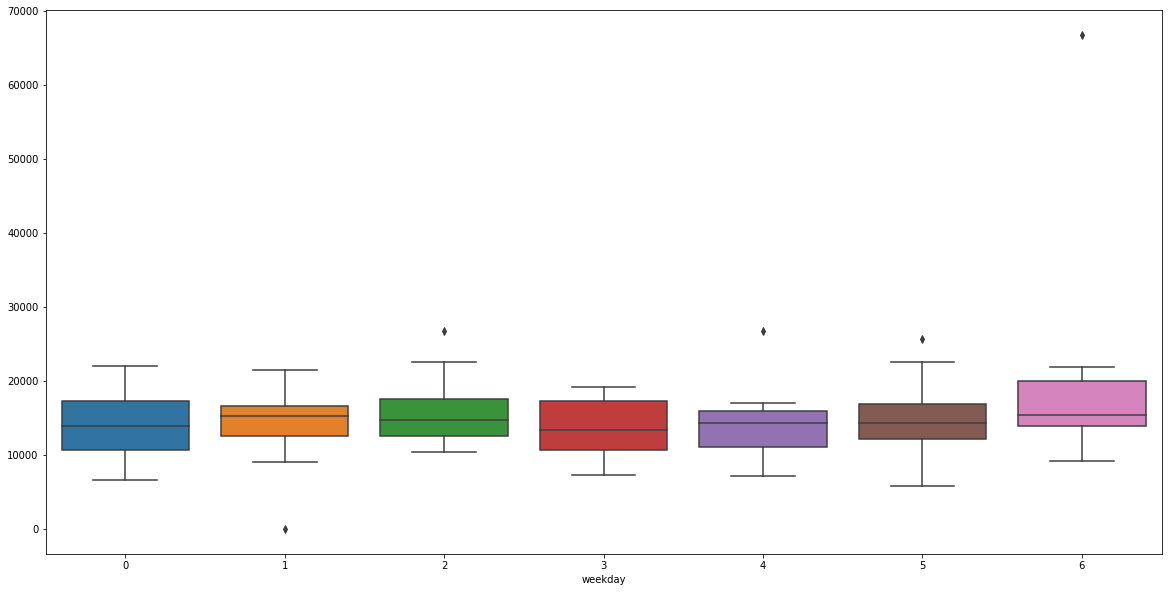

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data_day_boxplot[weekday])

Первая идея, которая у меня возникла - если человек живет по некоторому недельному расписанию/режиму (например, с понедельника по пятницу ходит на работу, по по определенным дням бегает, на выходных выезжает за город и т.д.), то можно построить модель выявляющие аномалии в этом расписании. 

Но визуально по графикам исходных данных какой-либо зависимости не наблюдается. Все графики недели отличаются друг от друга. И почти отсутствует схожесть данных в зависимости от дня недели. Предварительно можно сделать вывод, что условный пользователь, от которого получены данные, живет не по недельному графику и каждый его определенный день недели разнообразен и может не совпадать с такими же днемя на предыдущих неделях.


Рассмотрим второй вариант, преобразуем в данные по часам

In [14]:
data_copy_hours = data.copy()

In [15]:
data_copy_hours.drop(['Time End','Time Start','Time Offset','User ID','Time End Local Tz'], axis=1, inplace=True)

In [16]:
data_hour = data_copy_hours.resample('H').sum()
data_hour.head()

,Value
Time Start Local Tz,
2019-05-02 00:00:00+03:00,21.0
2019-05-02 01:00:00+03:00,0.0
2019-05-02 02:00:00+03:00,0.0
2019-05-02 03:00:00+03:00,0.0
2019-05-02 04:00:00+03:00,0.0


Создадим таблицу, где данные будут разбиты по часам

In [17]:
data_hour['date'] = data_hour.index.date
data_hour['hour'] = data_hour.index.hour
data_hour

,Value,date,hour
Time Start Local Tz,,,
2019-05-02 00:00:00+03:00,21.0,2019-05-02,0
2019-05-02 01:00:00+03:00,0.0,2019-05-02,1
2019-05-02 02:00:00+03:00,0.0,2019-05-02,2
2019-05-02 03:00:00+03:00,0.0,2019-05-02,3
2019-05-02 04:00:00+03:00,0.0,2019-05-02,4
...,...,...,...
2019-08-14 12:00:00+03:00,266.0,2019-08-14,12
2019-08-14 13:00:00+03:00,60.0,2019-08-14,13
2019-08-14 14:00:00+03:00,1684.0,2019-08-14,14


In [18]:
train_data=data_hour.pivot(index='date', columns='hour', values='Value')
train_data.fillna(0, inplace=True)
train_data.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2019-05-02,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1318.0,...,252.0,3248.0,3349.0,181.0,20.0,1405.0,137.0,0.0,1061.0,30.0
2019-05-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1406.0,...,3420.0,3241.0,1404.0,3062.0,0.0,0.0,0.0,3057.0,17.0,0.0
2019-05-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,677.0,754.0,1472.0,33.0,0.0,0.0,0.0,154.0,565.0,0.0
2019-05-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,2444.0,...,2178.0,172.0,92.0,545.0,1552.0,873.0,473.0,212.0,569.0,77.0
2019-05-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1336.0,...,117.0,41.0,732.0,57.0,142.0,131.0,1319.0,9.0,1773.0,0.0


Строим еженедельный график шагов:

Time Start Local Tz
19    AxesSubplot(0.125,0.2;0.775x0.68)
20    AxesSubplot(0.125,0.2;0.775x0.68)
21    AxesSubplot(0.125,0.2;0.775x0.68)
22    AxesSubplot(0.125,0.2;0.775x0.68)
23    AxesSubplot(0.125,0.2;0.775x0.68)
24    AxesSubplot(0.125,0.2;0.775x0.68)
25    AxesSubplot(0.125,0.2;0.775x0.68)
26    AxesSubplot(0.125,0.2;0.775x0.68)
27    AxesSubplot(0.125,0.2;0.775x0.68)
28    AxesSubplot(0.125,0.2;0.775x0.68)
29    AxesSubplot(0.125,0.2;0.775x0.68)
30    AxesSubplot(0.125,0.2;0.775x0.68)
31    AxesSubplot(0.125,0.2;0.775x0.68)
32    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

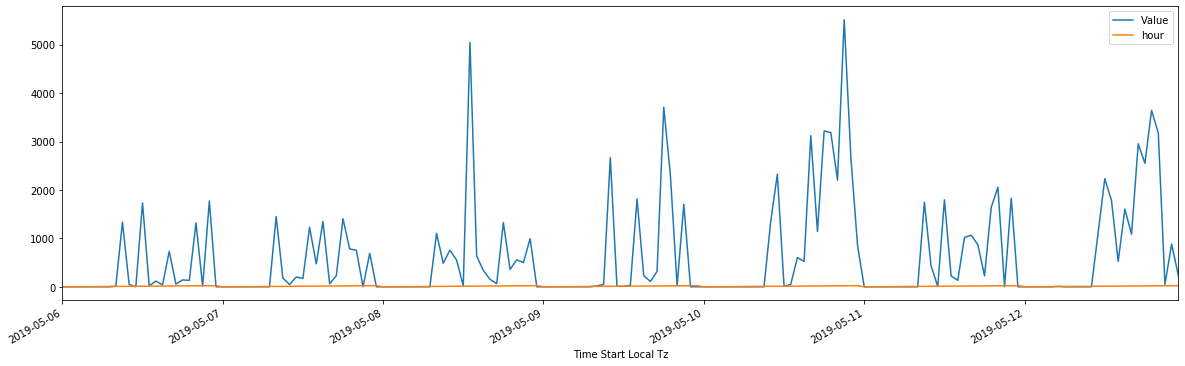

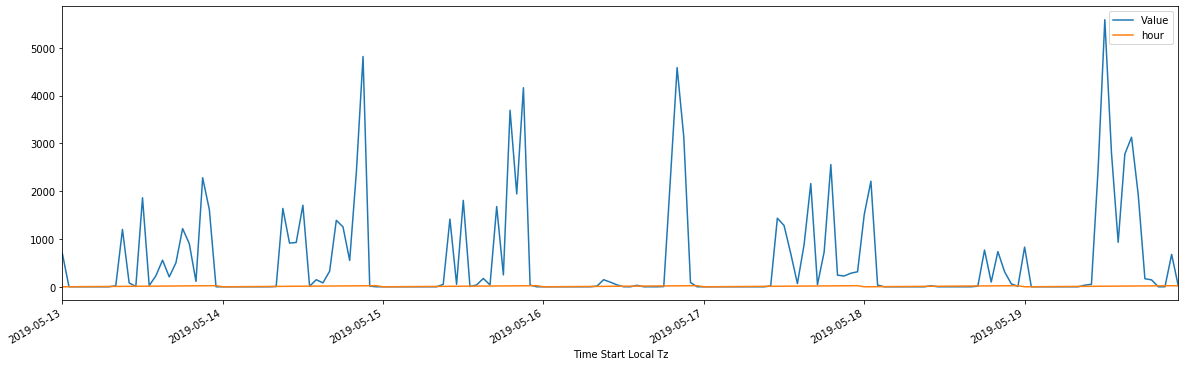

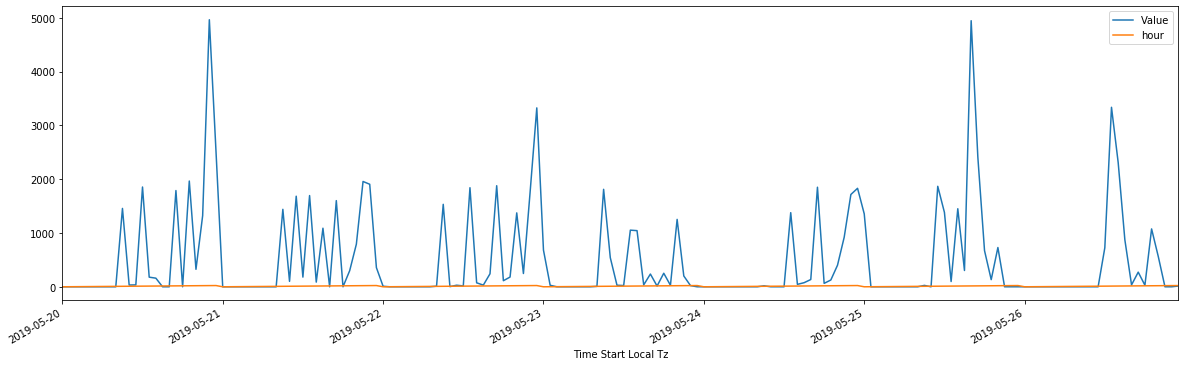

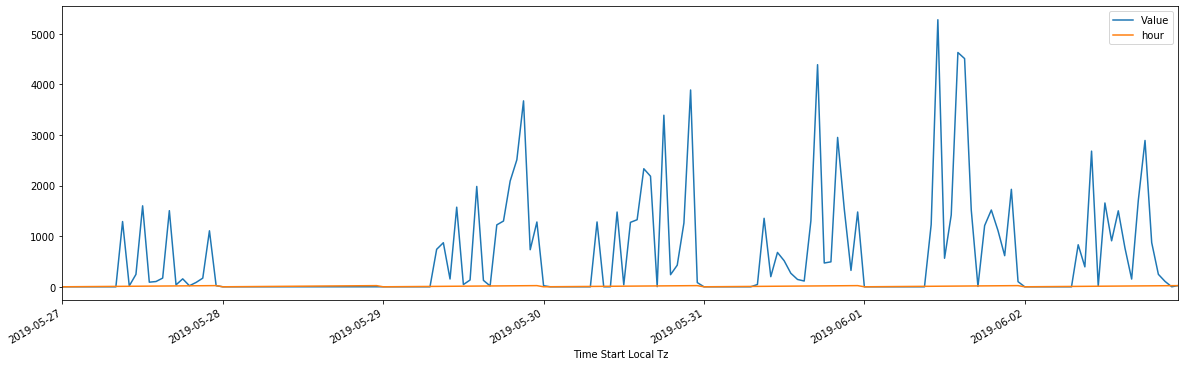

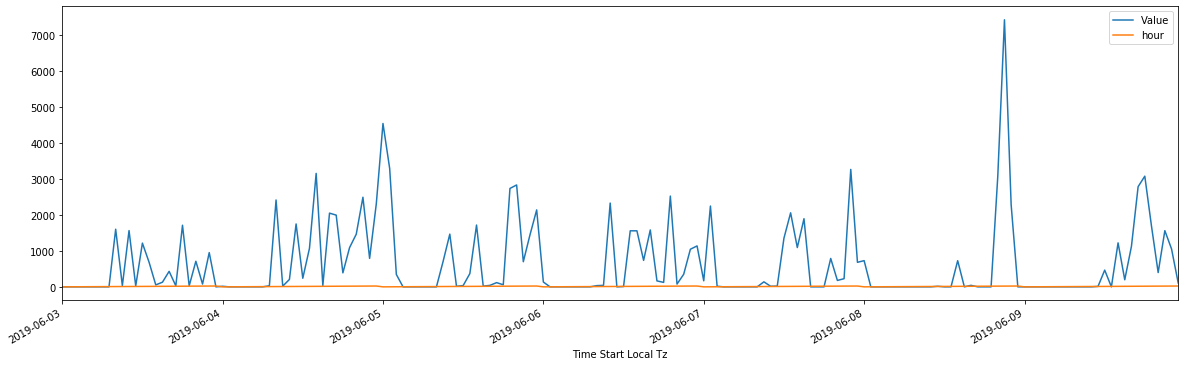

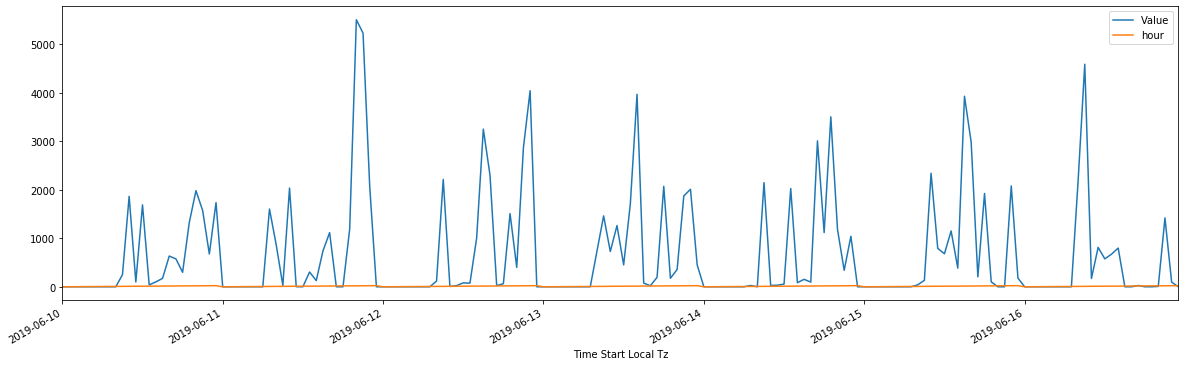

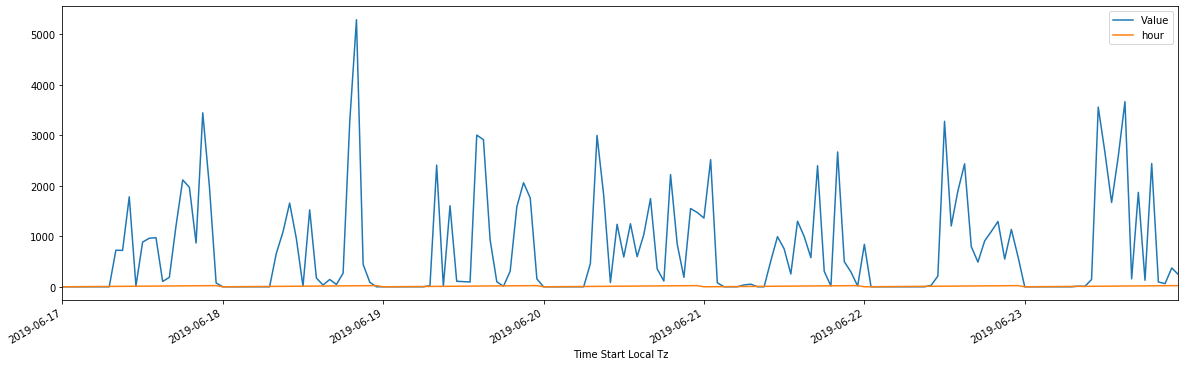

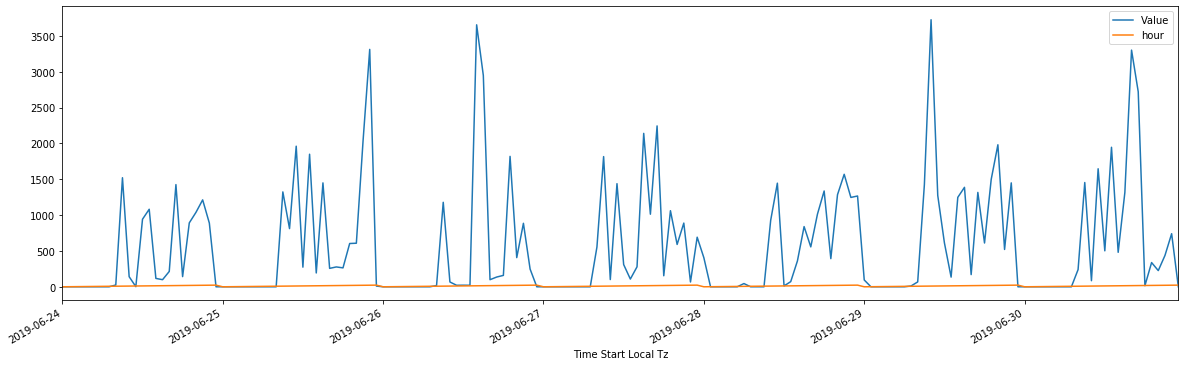

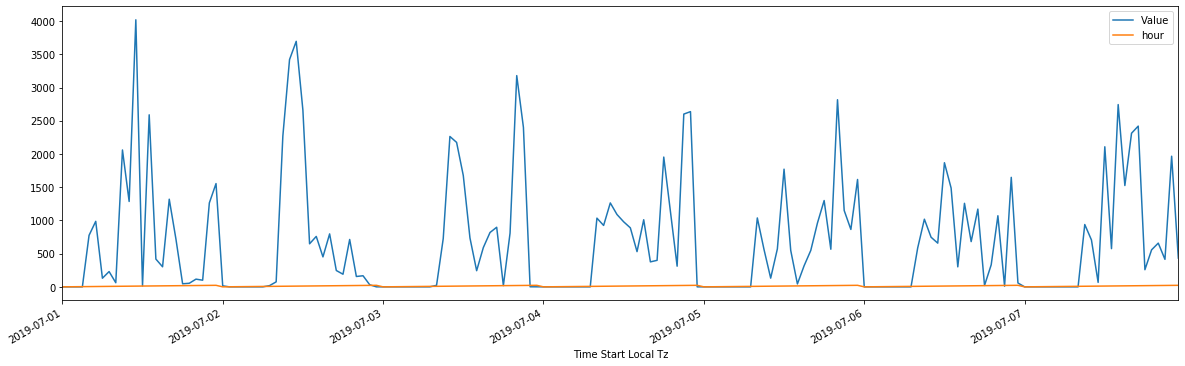

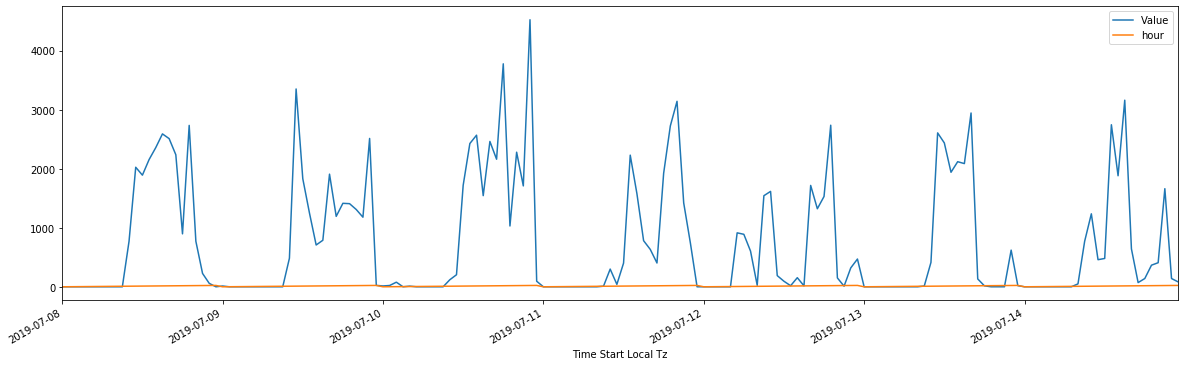

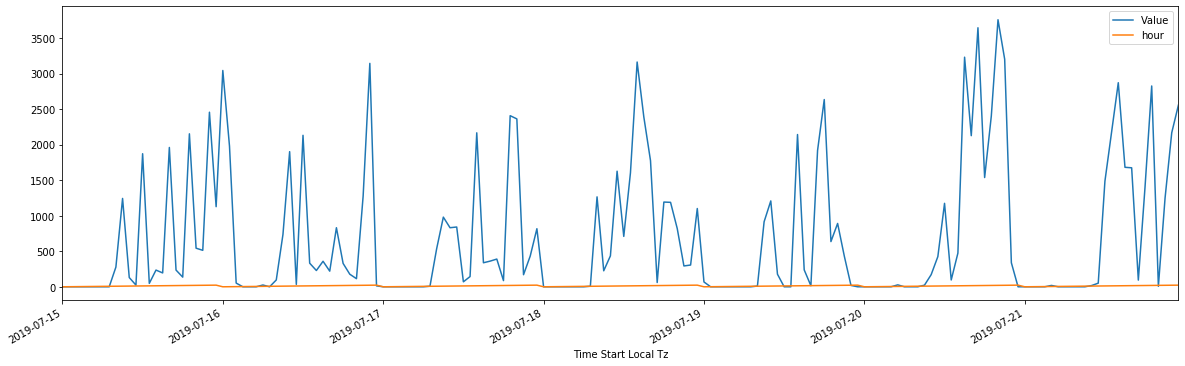

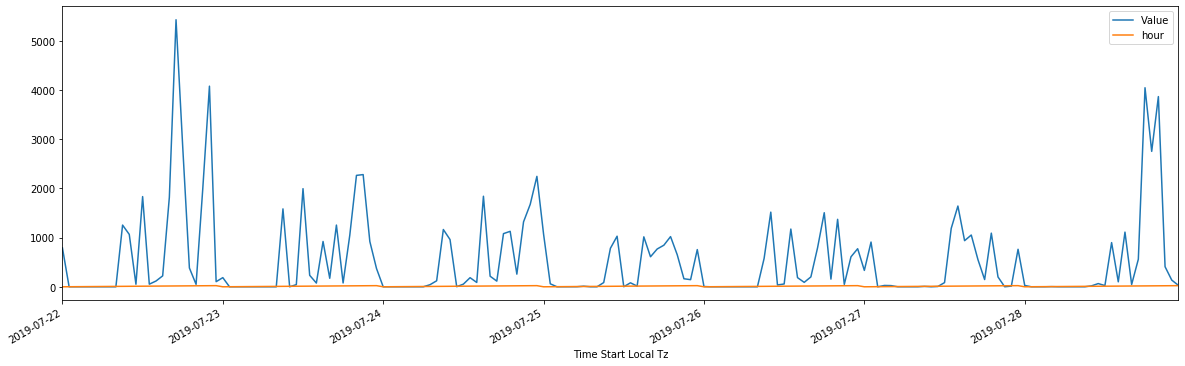

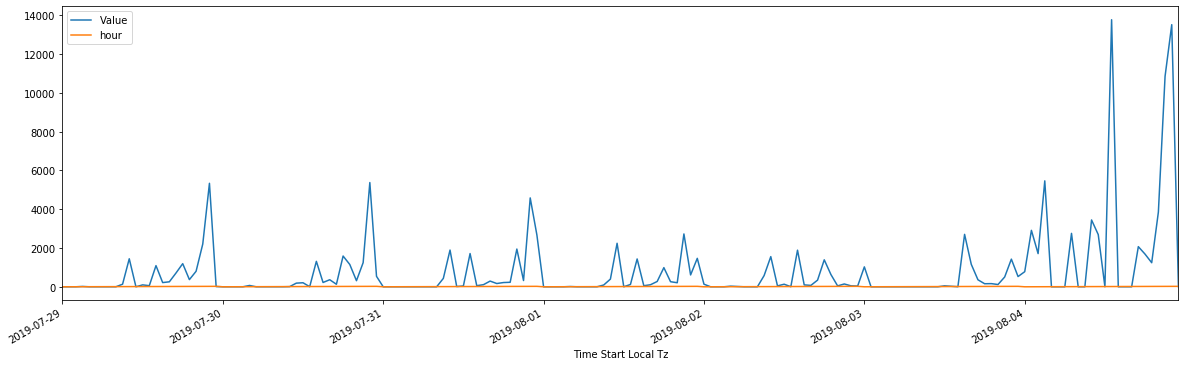

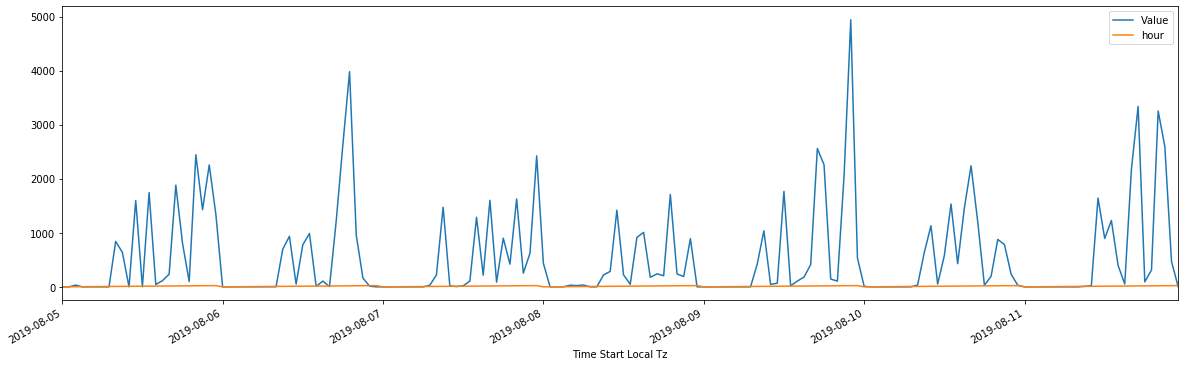

In [19]:
data_hour['2019-05-06':'2019-08-11'].groupby(by=[data_hour['2019-05-06':'2019-08-11'].index.week]).plot(figsize=(20,6))

In [20]:
hour=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

Так же изучим распределение по часам.

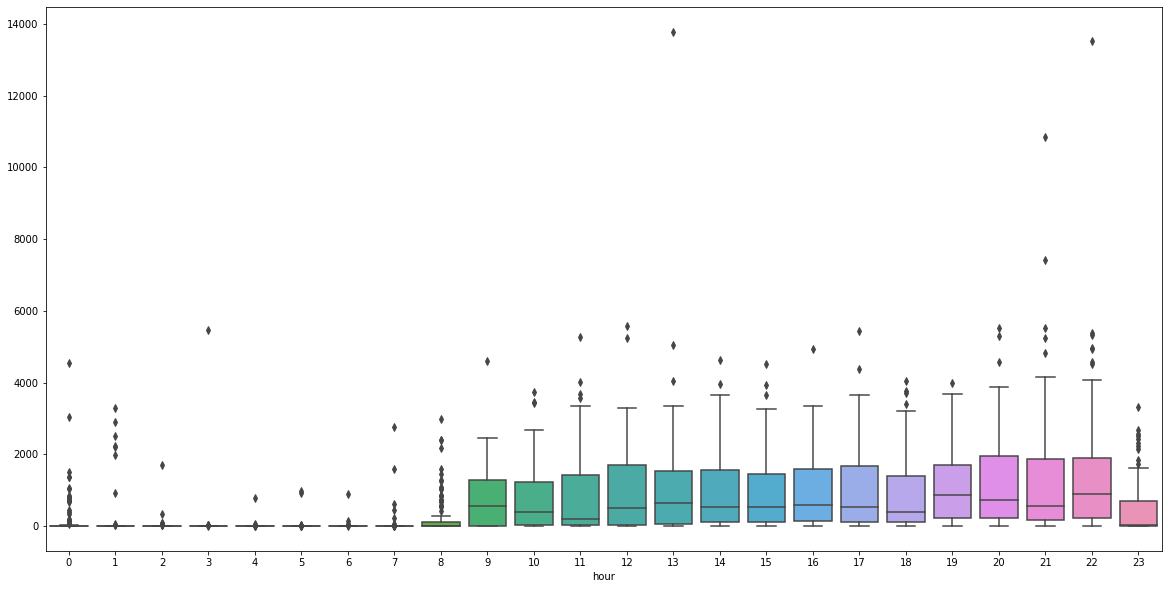

In [21]:
plt.figure(figsize=(20,10))
sns.boxplot(data=train_data[hour])

По графикам можно сделать вывод, что бывают дни с пиковыми нагрузками в некоторые часы.

Добавим в тренировочные данные дополнительные признаки(features): дни недели

Так как зависимость от дней недели не прослеживается, попробуем добавить дополнительный признак - медианное сглаживание значений с шириноц окна в несколько дней

У нас естьодин сильный выброс со значением шагов в 66761 за одинь день, он явно попадет в отдельный кластер. Поэтому проведем кластеризацию на 4 кластера.

Для кластеризации использую метод кластеризации K-means.


In [22]:
train_data

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2019-05-02,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1318.0,...,252.0,3248.0,3349.0,181.0,20.0,1405.0,137.0,0.0,1061.0,30.0
2019-05-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1406.0,...,3420.0,3241.0,1404.0,3062.0,0.0,0.0,0.0,3057.0,17.0,0.0
2019-05-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,677.0,754.0,1472.0,33.0,0.0,0.0,0.0,154.0,565.0,0.0
2019-05-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,2444.0,...,2178.0,172.0,92.0,545.0,1552.0,873.0,473.0,212.0,569.0,77.0
2019-05-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1336.0,...,117.0,41.0,732.0,57.0,142.0,131.0,1319.0,9.0,1773.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-10,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,634.0,...,429.0,1460.0,2240.0,1203.0,29.0,195.0,877.0,782.0,233.0,28.0
2019-08-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,398.0,52.0,2180.0,3338.0,92.0,311.0,3254.0,2594.0,467.0,0.0
2019-08-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,...,4.0,250.0,2375.0,95.0,997.0,601.0,666.0,3478.0,1872.0,2.0


In [23]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(train_data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [24]:
K_mins_clas=kmeans.predict(train_data)
train_data['class']= K_mins_clas


Построим график для визуального анализа:

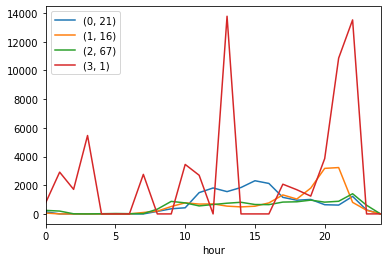

In [25]:
for i in range(0,4):    
    train_data[train_data['class']== i].mean().plot(label=(i, len(train_data[train_data['class']== i])))
plt.legend()

Вывод:

Обычный день: равномерное количество шагов в течении дня (класс 2 на графике).

Необычный день: есть пиковые нагрузки в середине дня или вечером (класс 0 и 1).

Непонятный день: большие выбросы в т.ч. ночью (класс 3 получился один день)


Как вариант, можно создать как дополнительный признак скользяющую среднюю (с шириной окна 4) и на ее основе сделать класстеризацию

In [26]:
days_sma = data_day.rolling(window=4).mean()

In [27]:
days_sma

,Value
Time Start Local Tz,
2019-05-02 00:00:00+03:00,NaN
2019-05-03 00:00:00+03:00,NaN
2019-05-04 00:00:00+03:00,NaN
2019-05-05 00:00:00+03:00,13854.00
2019-05-06 00:00:00+03:00,12476.50
...,...
2019-08-10 00:00:00+03:00,11923.50
2019-08-11 00:00:00+03:00,13217.00
2019-08-12 00:00:00+03:00,15131.50


In [28]:
train_data_sma = data_day.copy()

In [29]:
train_data_sma['Value_sma'] = days_sma['Value'].values 

In [30]:
train_data_sma = train_data_sma.drop(columns = 'date')

In [31]:
train_data_sma = train_data_sma.dropna()

In [32]:
train_data_sma.index = pd.RangeIndex(len(train_data_sma.index))

In [33]:
train_data_sma['difference'] = abs(train_data_sma['Value'] - train_data_sma['Value_sma'])

In [34]:
train_data_sma

,Value,Value_sma,difference
0,11124.0,13854.00,2730.00
1,7467.0,12476.50,5009.50
2,9027.0,10482.50,1455.50
3,12888.0,10126.50,2761.50
4,12982.0,10591.00,2391.00
...,...,...,...
97,11443.0,11923.50,480.50
98,16482.0,13217.00,3265.00
99,15952.0,15131.50,820.50
100,11695.0,13893.00,2198.00


In [35]:
c = pd.cut(
    train_data_sma.stack(),
    [0, 3000, 16000, np.inf],
    labels=['1', '2', '3']
)
temp=train_data_sma.join(c.unstack().add_suffix('_class'))

In [36]:
train_data_sma['class'] = temp['difference_class']

In [37]:
train_data_sma['class'] = train_data_sma['class'].astype('int64')

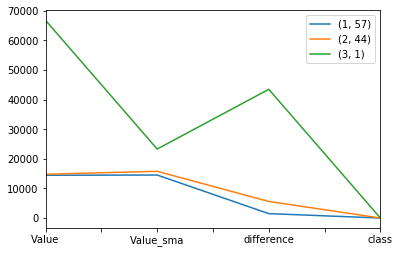

In [38]:
for i in range(1,4):    
    train_data_sma[train_data_sma['class']== i].mean().plot(label=(i, len(train_data_sma[train_data_sma['class']== i])))
plt.legend()

Вывод:

Обычный день: ежедневное количество шагов близко к значению скользящей средней(класс 1).

Необычный день: есть расхождения больше 3000 шагов (класс 2).

Непонятный день: большая разницаб свыше 16000 шагов (класс 3 получился один день)



In [39]:
train_data_sma.index = pd.RangeIndex(len(train_data_sma.index))

In [40]:
writer = pd.ExcelWriter('result_sma.xlsx', engine='xlsxwriter')
train_data_sma.to_excel(writer, 'Sheet1')
writer.save()